In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importar el Data Set
dataSet = pd.read_csv("Position_Salaries.csv")

In [25]:
print(dataSet.head())
print("Numero de filas: ", dataSet.shape[0])

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
Numero de filas:  10


In [32]:
X = dataSet.iloc[:, 1:2].values
y = dataSet.iloc[:, 2].values

In [33]:
print("type(X): ", type(X), ", Filas y Columnas X: ", X.shape, ", Filas de X: ", X.shape[0])
print("type(y): ", type(y), ", Filas y Columnas y: ", y.shape, ", Filas de y: ", y.shape[0])

type(X):  <class 'numpy.ndarray'> , Filas y Columnas X:  (10, 1) , Filas de X:  10
type(y):  <class 'numpy.ndarray'> , Filas y Columnas y:  (10,) , Filas de y:  10


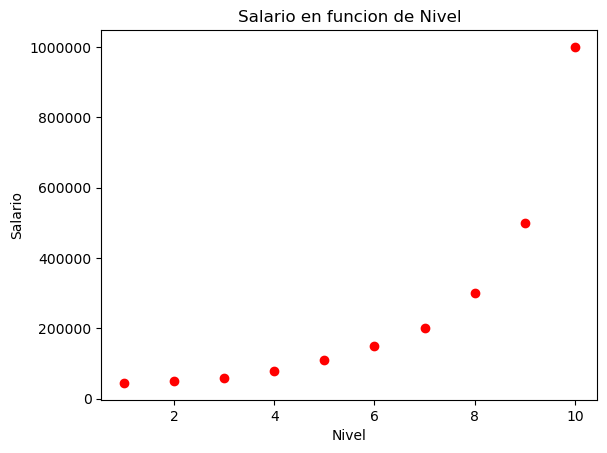

In [7]:
#Visualizar Conjunto de Datos Originales
from matplotlib.ticker import FuncFormatter, ScalarFormatter
plt.scatter(X, y, color = "red")
plt.title("Salario en funcion de Nivel")
plt.xlabel("Nivel")
plt.ylabel("Salario")

fmt = ScalarFormatter()
fmt.set_scientific(False)
plt.gca().yaxis.set_major_formatter(fmt)


plt.show()

In [8]:
#Ajustar el modelo Regression Tree al Data Set
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(random_state = 0)
regression.fit(X, y)

DecisionTreeRegressor(random_state=0)

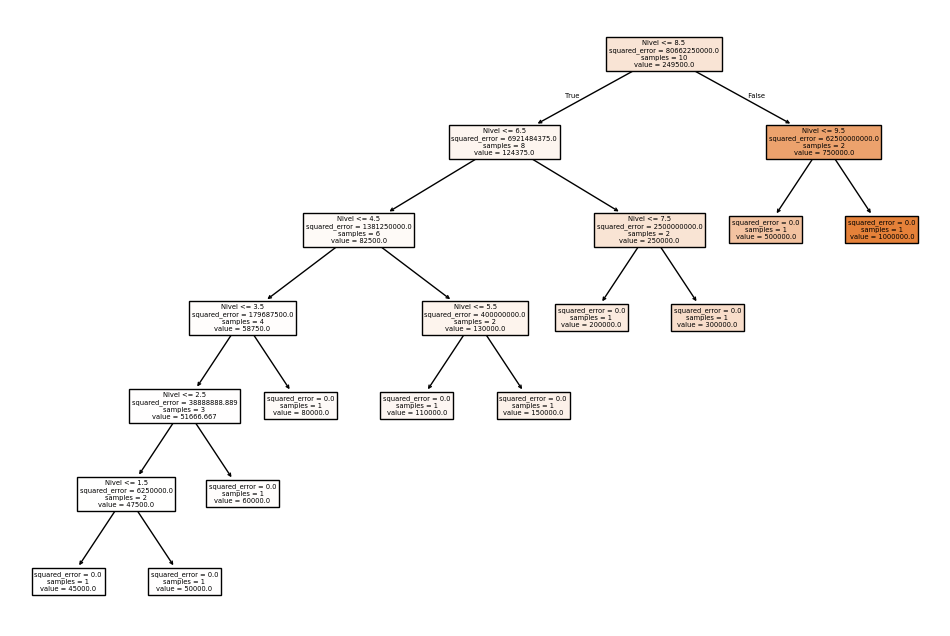

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(regression, feature_names=["Nivel"], filled=True)
plt.show()

In [12]:
from sklearn.tree import export_text
print(export_text(regression, feature_names=["Nivel"]))

|--- Nivel <= 8.50
|   |--- Nivel <= 6.50
|   |   |--- Nivel <= 4.50
|   |   |   |--- Nivel <= 3.50
|   |   |   |   |--- Nivel <= 2.50
|   |   |   |   |   |--- Nivel <= 1.50
|   |   |   |   |   |   |--- value: [45000.00]
|   |   |   |   |   |--- Nivel >  1.50
|   |   |   |   |   |   |--- value: [50000.00]
|   |   |   |   |--- Nivel >  2.50
|   |   |   |   |   |--- value: [60000.00]
|   |   |   |--- Nivel >  3.50
|   |   |   |   |--- value: [80000.00]
|   |   |--- Nivel >  4.50
|   |   |   |--- Nivel <= 5.50
|   |   |   |   |--- value: [110000.00]
|   |   |   |--- Nivel >  5.50
|   |   |   |   |--- value: [150000.00]
|   |--- Nivel >  6.50
|   |   |--- Nivel <= 7.50
|   |   |   |--- value: [200000.00]
|   |   |--- Nivel >  7.50
|   |   |   |--- value: [300000.00]
|--- Nivel >  8.50
|   |--- Nivel <= 9.50
|   |   |--- value: [500000.00]
|   |--- Nivel >  9.50
|   |   |--- value: [1000000.00]



In [14]:
#Mostrar hiperparametros del arbol
regression.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [20]:
y_pred = regression.predict(np.array([6.5]).reshape(1,-1))
y_pred

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([150000.])

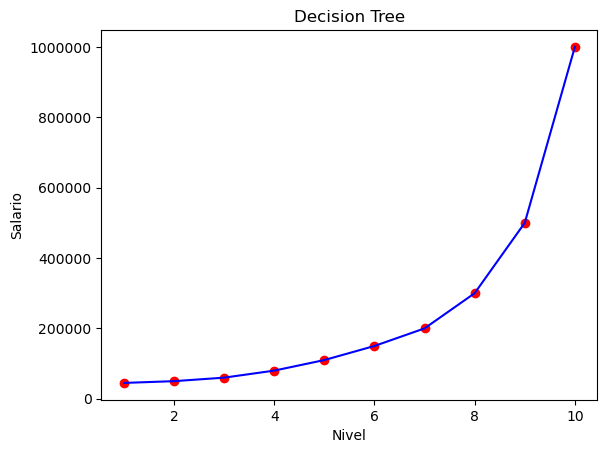

In [22]:
#Visualizar los resultados de Decision Tree
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Decision Tree")
plt.xlabel("Nivel")
plt.ylabel("Salario")

fmt = ScalarFormatter()
fmt.set_scientific(False)
plt.gca().yaxis.set_major_formatter(fmt)


plt.show()